In [1]:
# Librairies basiques d'exploitation et visualization de données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random # Pour pouvoir mélanger notre jeu de données

In [5]:
# Modules pour le pré-processing
from qualitative_prep import Qual_Standardize
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA as ACP
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler, FunctionTransformer

from sklearn.utils import shuffle

# Module pour l'exploration de la projection factorielle
from fanalysis.pca import PCA

# Modèle pour la modélisation
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

# Module pour l'affichage
from sklearn import set_config
set_config(display="diagram")

# Librairie pour la lecture et enregistrement des modèles
import pickle

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("data_train.csv")

# Dépendance

On sélectionne uniquement les dépendances

In [8]:
dep = df.loc[df["Type local"] == "Dépendance"]
dep.head(15)

,Valeur fonciere,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,exterieur,year,month,nom_region,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,Normalized_Mutations
5,171500.0,Dépendance,0.0,0,973.0,1.0,2019,2,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
47,193000.0,Dépendance,0.0,0,0.0,0.0,2020,3,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
49,85000.0,Dépendance,0.0,0,0.0,0.0,2020,7,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
54,70000.0,Dépendance,0.0,0,0.0,0.0,2020,12,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
90,136750.0,Dépendance,0.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
91,136750.0,Dépendance,0.0,0,0.0,0.0,2018,1,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
154,92100.0,Dépendance,0.0,0,0.0,0.0,2018,2,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
155,92100.0,Dépendance,0.0,0,0.0,0.0,2018,2,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
166,80000.0,Dépendance,0.0,0,0.0,0.0,2018,3,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454
167,80000.0,Dépendance,0.0,0,0.0,0.0,2018,3,Auvergne-Rhône-Alpes,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389,0.138454


On repère les duplicatas et on les enlèves.

In [6]:
dep.duplicated().sum()/dep.shape[0]
dep = dep.drop_duplicates()

0.25826820463578576

In [9]:
dep.drop(columns=["month", "nom_region", "Surface reelle bati","Nombre pieces principales", "Normalized_Mutations", "Type local"], inplace=True) # On enlève les variables qui ne nous serviront pas

In [12]:
dep.head()

,Valeur fonciere,Type local,Surface terrain,exterieur,year,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
5,171500.0,Dépendance,973.0,1.0,2019,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
47,193000.0,Dépendance,0.0,0.0,2020,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
49,85000.0,Dépendance,0.0,0.0,2020,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
54,70000.0,Dépendance,0.0,0.0,2020,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
90,136750.0,Dépendance,0.0,0.0,2018,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


# Préparation de la pipeline pour le préprocessing

In [13]:
# On déclare nos variables quantitatives
quant_columns = [
       'Surface terrain','pop_active',
       'salaire_moyen', 'nb_etab_elem', "mean_prixm2","q1_prixm2","q3_prixm2","Total_Mutations"]

# On déclare nos variables quantitatives
cat_columns = [ 'exterieur']

In [16]:
# On crée une première pipeline qui va centrer et réduire nos variables quantitatives
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())]
)


# On crée une seconde pipeline qui va créer un tableau disjonctif de notre variable qualitative puis la standardiser
categorical_transformer = Pipeline(
    steps=[("disjonctif", OneHotEncoder(handle_unknown="error")),
            ("standardize", Qual_Standardize())

    ]
)

# On crée un ColumnTransformer qui appliquera nos pipelines selon si elles sont qualitatives, quantitatives ou si c'est "Type local"
preprocessor = ColumnTransformer(
    transformers=[

        ("num", numeric_transformer, quant_columns),
        ("cat", categorical_transformer, cat_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Surface terrain', 'pop_active',
                                  'salaire_moyen', 'nb_etab_elem',
                                  'mean_prixm2', 'q1_prixm2', 'q3_prixm2',
                                  'Total_Mutations']),
                                ('cat',
                                 Pipeline(steps=[('disjonctif',
                                                  OneHotEncoder()),
                                                 ('standardize',
                                                  <qualitative_prep.Qual_Standardize object at 0x0000029FC19D9EB0>)]),
                                 ['exterieur'])])

In [15]:
# On convertit notre variable extérieur en booléen.
dep["exterieur"] = dep["exterieur"].astype(bool)

Une fois nettoyé, nous pouvons séparer les variables exogènes de la variable endogène (valeur fonciere).

In [25]:
d_X = dep.iloc[:,1:]
d_X.head()

,Surface terrain,exterieur,year,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
5,973.0,1.0,2019,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
47,0.0,0.0,2020,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
49,0.0,0.0,2020,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
54,0.0,0.0,2020,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389
90,0.0,0.0,2018,320682.0,15.336249,405,2235.777587,1662.166667,2653.858156,12389


In [26]:
d_y = dep.iloc[:,0]
d_y.head()

5     171500.0
47    193000.0
49     85000.0
54     70000.0
90    136750.0
Name: Valeur fonciere, dtype: float64

Nous pouvons ensuite récupérer l'échantillon test et l'échantillon d'apprentissage.

In [27]:
# On divise notre jeu de données en un échantillon d'apprentissage et un test
d_X_train, d_X_test, d_y_train, d_y_test = train_test_split(d_X,d_y, test_size=0.33, random_state=1)

In [28]:
d_X_train.head()

,Surface terrain,exterieur,year,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
690480,0.0,0.0,2018,693553.0,15.831803,634,2471.561903,1861.572500,2935.536000,54340
36618,0.0,0.0,2021,71118.0,14.153700,129,2106.623975,1713.250000,2410.000000,3949
363615,0.0,0.0,2020,405879.0,14.324161,534,1812.268260,1422.877273,2157.753655,18104
1452784,0.0,0.0,2021,64451.0,15.815221,97,1704.732641,1477.812000,1907.687500,1816
769363,0.0,0.0,2021,381242.0,14.228413,567,1750.400172,1416.864500,1963.725000,42380


In [29]:
d_X_train.describe()

,Surface terrain,exterieur,year,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations
count,110245.000000,110245.000000,110245.000000,1.102450e+05,110245.000000,110245.000000,110245.000000,110245.000000,110245.000000,110245.000000
mean,26.063776,0.163073,2019.559998,5.298003e+05,16.151372,506.976715,2625.682908,2030.377028,3077.877463,29701.604753
std,106.687700,0.369434,1.120301,2.801810e+05,2.793623,253.981548,1241.512097,1088.329783,1392.083347,22158.697398
min,0.000000,0.000000,2018.000000,3.377600e+04,12.700402,82.000000,911.287257,733.250000,1020.125000,1253.000000
25%,0.000000,0.000000,2019.000000,3.090530e+05,14.478280,332.000000,1812.268260,1337.478500,2088.188500,16678.000000
50%,0.000000,0.000000,2020.000000,5.180540e+05,15.321083,464.000000,2235.777587,1614.083333,2603.405000,21501.000000
75%,0.000000,0.000000,2021.000000,7.044710e+05,16.824866,583.000000,3356.235516,2448.610500,3681.028500,40164.000000
max,1123.000000,1.000000,2021.000000,1.181037e+06,26.024599,1316.000000,6786.488293,5968.657000,7483.084000,89481.000000


In [30]:
d_y_train.head()

690480     210000.0
36618      300000.0
363615     170000.0
1452784     93100.0
769363      96000.0
Name: Valeur fonciere, dtype: float64

On applique notre pipeline pour appliquer notre preprocessing sur les données.

In [33]:
X_train_preprocessed = preprocessor.fit_transform(d_X_train, d_y_train)

In [34]:
# On récupère les noms de colonnes de notre tableau disjonctif de nos variables qualitatives
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['disjonctif'].get_feature_names_out(cat_columns)
cat_feature_names

array(['exterieur_0.0', 'exterieur_1.0'], dtype=object)

In [35]:
# On crée une liste avec toutes nos variables (dans l'ordre de la pipeline)
all_feature_names = np.concatenate([quant_columns, cat_feature_names])

In [36]:
# On transforme notre échantillon d'apprentissage
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_train_preprocessed

,Surface terrain,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,exterieur_0.0,exterieur_1.0
0,-0.244301,0.584456,-0.114393,0.500130,-0.124140,-0.155105,-0.102251,1.111911,1.093091,0.000000
1,-0.244301,-1.637100,-0.715086,-1.488212,-0.418088,-0.291390,-0.479770,-1.162195,1.093091,0.000000
2,-0.244301,-0.442292,-0.654068,0.106399,-0.655184,-0.558197,-0.660972,-0.523391,1.093091,0.000000
3,-0.244301,-1.660896,-0.120329,-1.614206,-0.741801,-0.507721,-0.840607,-1.258455,1.093091,0.000000
4,-0.244301,-0.530225,-0.688342,0.236330,-0.705017,-0.563722,-0.800353,0.572166,1.093091,0.000000
...,...,...,...,...,...,...,...,...,...,...
110240,0.214986,-1.110631,-0.692952,-0.724374,-0.859480,-0.763645,-0.915720,-0.608414,0.000000,2.476331
110241,-0.244301,-0.354937,-0.154128,-0.330643,1.054606,1.104907,0.931595,-0.442384,1.093091,0.000000
110242,-0.244301,-0.041924,-0.297210,0.220581,-0.520935,-0.499136,-0.588671,0.077414,1.093091,0.000000
110243,-0.244301,-0.138840,0.078727,-0.488135,0.596824,-0.018765,1.027631,2.697797,1.093091,0.000000


In [38]:
# On transforme notre échantillon test
X_test_preprocessed = pd.DataFrame(preprocessor.transform(d_X_test), columns=all_feature_names)
X_test_preprocessed

,Surface terrain,pop_active,salaire_moyen,nb_etab_elem,mean_prixm2,q1_prixm2,q3_prixm2,Total_Mutations,exterieur_0.0,exterieur_1.0
0,-0.244301,-0.901701,-0.340685,-0.259771,-0.584864,-0.340802,-0.711546,-0.624751,1.093091,0.000000
1,1.574099,-0.708828,-0.649122,-0.074717,-0.447125,-0.682455,-0.445223,-0.699124,0.000000,2.476331
2,-0.244301,-0.983887,-0.690228,-0.543257,-1.039462,-0.869069,-1.111364,-0.750571,1.093091,0.000000
3,-0.244301,-1.054228,-0.440063,-0.688938,-0.321024,-0.174100,-0.359663,-0.944762,1.093091,0.000000
4,1.067946,-1.377349,-0.656020,-1.047233,-1.000031,-0.780521,-1.058669,-1.053794,0.000000,2.476331
...,...,...,...,...,...,...,...,...,...,...
54296,-0.244301,-0.041924,-0.297210,0.220581,-0.520935,-0.499136,-0.588671,0.077414,1.093091,0.000000
54297,0.936722,-0.041924,-0.297210,0.220581,-0.520935,-0.499136,-0.588671,0.077414,0.000000,2.476331
54298,-0.244301,0.381711,0.607696,-0.145589,0.513241,0.714445,0.415744,-0.443557,1.093091,0.000000
54299,6.907446,0.584456,-0.114393,0.500130,-0.124140,-0.155105,-0.102251,1.111911,0.000000,2.476331


# Application de notre AFDM (ACP sur nos données quantitatives standardisées et qualitatives one-hot encodées et standardisées)

In [39]:
# On instantie notre ACP
my_pca = PCA(std_unit=True, row_labels=X_train_preprocessed.index.values, col_labels=X_train_preprocessed.columns.values)
my_pca

PCA(col_labels=array(['Surface terrain', 'pop_active', 'salaire_moyen', 'nb_etab_elem',
       'mean_prixm2', 'q1_prixm2', 'q3_prixm2', 'Total_Mutations',
       'exterieur_0.0', 'exterieur_1.0'], dtype=object),
    row_labels=array([     0,      1,      2, ..., 110242, 110243, 110244], dtype=int64))

In [40]:
# On la fait apprendre sur notre échantillon d'apprentissage 
my_pca.fit(X_train_preprocessed.values)
print(my_pca.eig_)

[[4.31138498e+00 2.14006512e+00 2.05979446e+00 6.25119917e-01
  5.48348647e-01 2.45237898e-01 4.16288083e-02 2.69173821e-02
  1.50278838e-03 2.42708628e-24]
 [4.31138498e+01 2.14006512e+01 2.05979446e+01 6.25119917e+00
  5.48348647e+00 2.45237898e+00 4.16288083e-01 2.69173821e-01
  1.50278838e-02 2.42708628e-23]
 [4.31138498e+01 6.45145010e+01 8.51124456e+01 9.13636448e+01
  9.68471312e+01 9.92995102e+01 9.97157983e+01 9.99849721e+01
  1.00000000e+02 1.00000000e+02]]


In [41]:
eigenvalues = pd.DataFrame({'eigenvalue' : my_pca.eig_[0]}) # Création d'un DataFrame à partir des valeurs propres du modèle AFC.
eigenvalues = eigenvalues.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.

# Conversion de la colonne "index" en type catégorie
eigenvalues["index"] = eigenvalues["index"].astype("category")

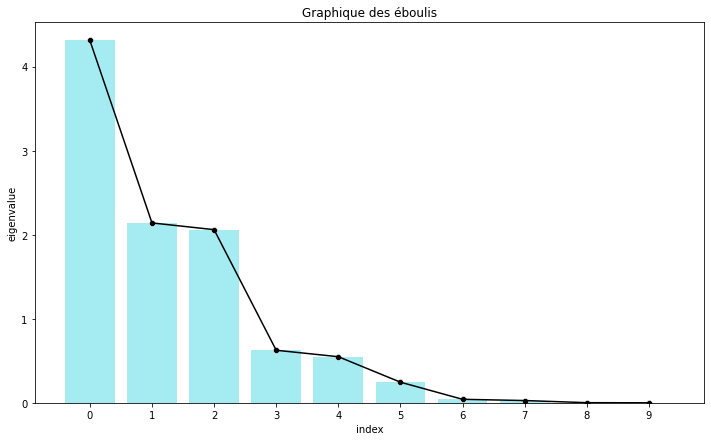

In [42]:
fig, axes = plt.subplots(figsize=(12, 7))
# Création d'un graphique à barres pour les valeurs propres.
sns.barplot(data=eigenvalues, x="index", y="eigenvalue", color="#98F5FF", ax=axes)
# Ajout d'un scatter plot pour les points des valeurs propres.
sns.scatterplot(data=eigenvalues, x="index", y="eigenvalue", color="black", ax=axes)
# Ajout d'une ligne pour connecter les points des valeurs propres.
sns.lineplot(data=eigenvalues, x="index", y="eigenvalue", color="black", ax=axes)
plt.title("Graphique des éboulis")
plt.show()

In [43]:
 # Création d'un DataFrame à partir des pourcentages d'inertie du modèle AFC.
pourcentage = pd.DataFrame({'pourcentage' : my_pca.eig_[1]})
pourcentage = pourcentage.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.

pourcentage["index"] = pourcentage["index"].astype("category") # Conversion de la colonne "index" en type catégorie

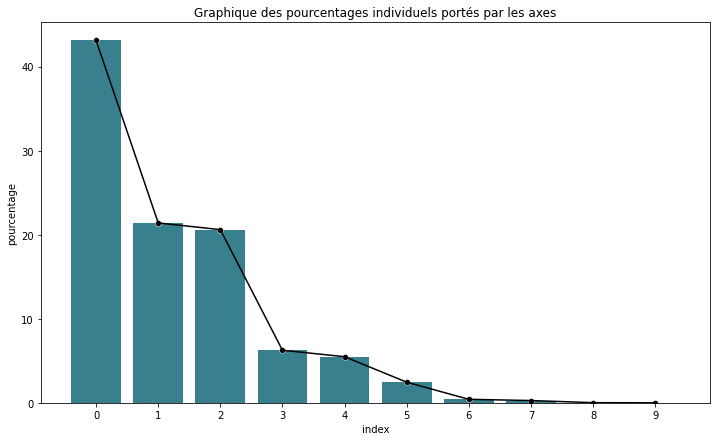

In [44]:
fig, axes = plt.subplots(figsize=(12, 7))
# Création d'un graphique à barres pour représenter les pourcentages.
sns.barplot(data=pourcentage, x="index", y="pourcentage", color="#2a8a9c", ax=axes)
# Création d'un graphique à barres pour représenter les pourcentages.
sns.scatterplot(data=pourcentage, x="index", y="pourcentage", color="black", ax=axes)
# Ajout d'une ligne pour connecter les points des pourcentages.
sns.lineplot(data=pourcentage, x="index", y="pourcentage", color="black", ax=axes)
# On obtient les valeurs minimales et maximales sur l'axe x.
xmin, xmax = axes.get_xlim() 
# On affiche une ligne horizontale qui représente le seuil de Kaiser.
plt.title("Graphique des pourcentages individuels portés par les axes")
plt.show()

In [45]:
cumsum = pd.DataFrame({'cumsum' : my_pca.eig_[2]}) # Création d'un DataFrame à partir des sommes cumulées d'inertie du modèle AFC.
cumsum = cumsum.reset_index() # Nous appliquons reset_index() pour récupérer les labels des dimensions pour le diagramme en barres.
# Conversion de la colonne "index" en type catégorie.
cumsum["index"] = cumsum["index"].astype("category")

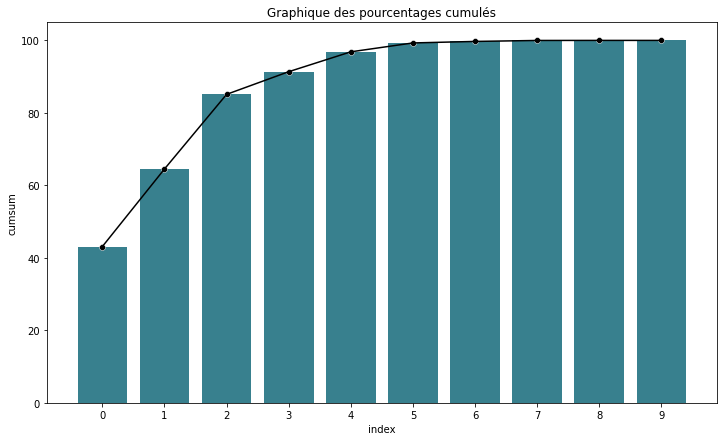

In [46]:
plt.figure(figsize=(12, 7))
# Création d'un graphique à barres pour représenter les pourcentages cumulés.
sns.barplot(data=cumsum, x="index", y="cumsum", color="#2a8a9c")
# Ajout d'un scatter plot pour les points des pourcentages cumulés.
sns.scatterplot(data=cumsum, x="index", y="cumsum", color="black")
# Ajout d'une ligne pour connecter les points des pourcentages cumulés.
sns.lineplot(data=cumsum, x="index", y="cumsum", color="black")
plt.title("Graphique des pourcentages cumulés")
plt.show()

Nous pouvons retrouver un coude à partir de la troisième composante (index 42). C'est également à partir de celle là que nous pouvons observer que le pourcentage de variance expliquée commence à stagner. Nous allons retenir trois composantes pour la réduction de dimensions.

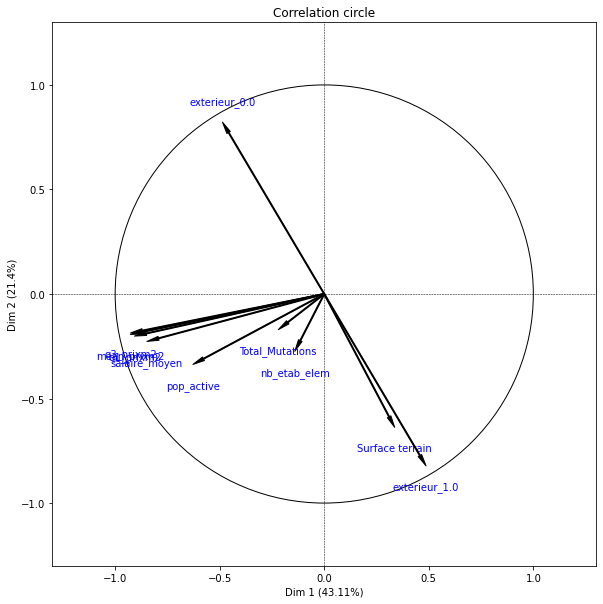

In [47]:
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(20, 10))

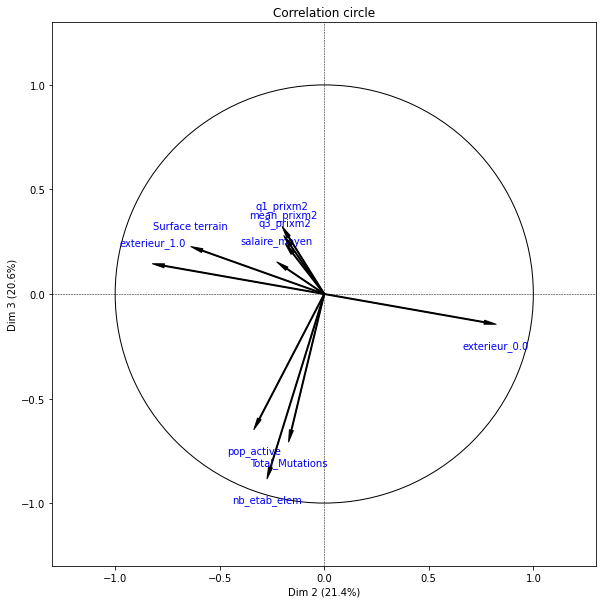

In [48]:
my_pca.correlation_circle(num_x_axis=2, num_y_axis=3, figsize=(20, 10))

In [49]:
# On extrait les valeurs en relation avec les variables
df_cols = my_pca.col_topandas()

In [50]:
# On extrait la contribution des variables à la définition des composantes
var_contrib = df_cols.iloc[:,10:13]
var_contrib

,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3
Surface terrain,2.632973,19.018612,2.497848
pop_active,9.154110,5.304367,20.420826
salaire_moyen,16.679260,2.404691,1.141028
nb_etab_elem,0.460321,3.507973,37.950923
mean_prixm2,19.932755,1.748114,3.782195
q1_prixm2,19.103762,1.894534,5.060897
q3_prixm2,19.922305,1.627492,2.815815
Total_Mutations,1.121701,1.360485,24.294446
exterieur_0.0,5.496406,31.566865,1.018011
exterieur_1.0,5.496406,31.566865,1.018011


In [52]:
# On extrait la qualité de représentation des variables sur les composantes
var_cos2 = df_cols.iloc[:,20:23]
var_cos2

,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3
Surface terrain,0.113518,0.407011,0.051451
pop_active,0.394669,0.113517,0.420627
salaire_moyen,0.719107,0.051462,0.023503
nb_etab_elem,0.019846,0.075073,0.781711
mean_prixm2,0.859378,0.037411,0.077905
q1_prixm2,0.823637,0.040544,0.104244
q3_prixm2,0.858927,0.034829,0.058000
Total_Mutations,0.048361,0.029115,0.500416
exterieur_0.0,0.236971,0.675551,0.020969
exterieur_1.0,0.236971,0.675551,0.020969


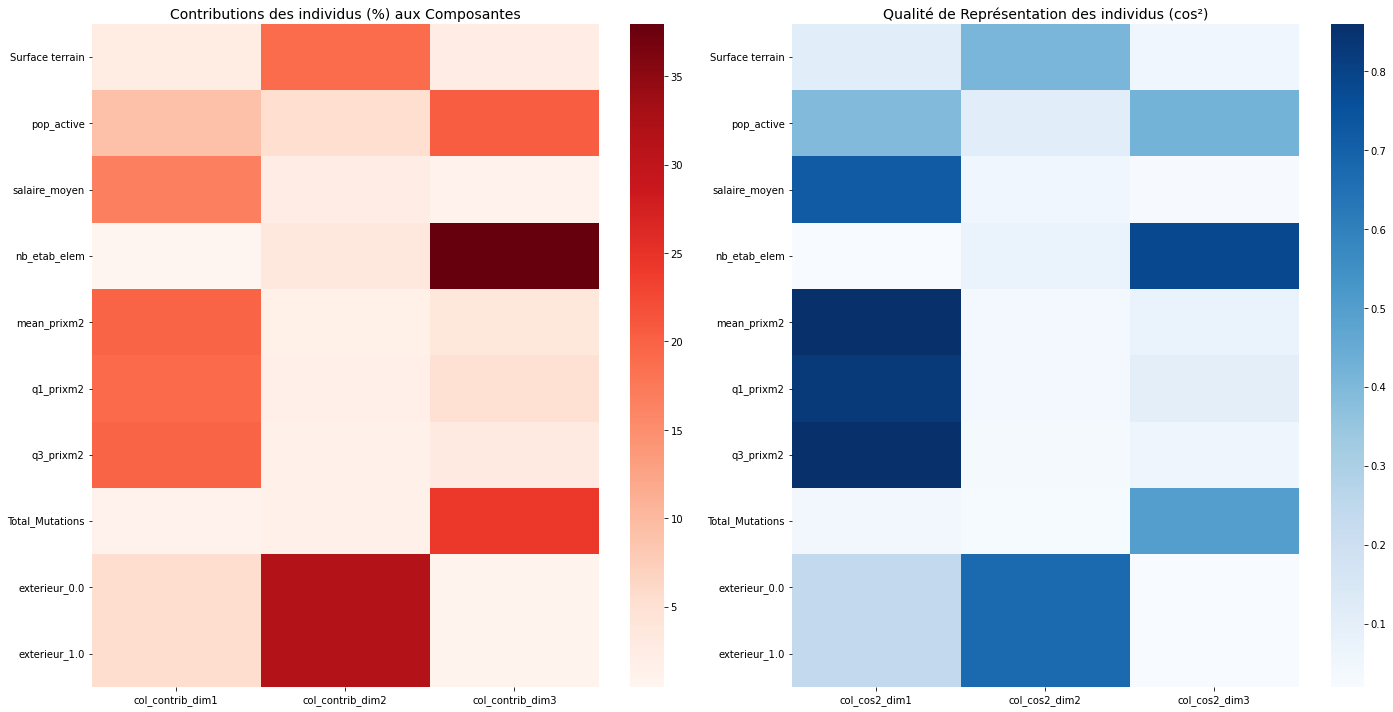

In [53]:
# On visualise les contributions et qualité de représentation grâce à des heatmaps.
fig = plt.figure(figsize=(20, 10))
spec = fig.add_gridspec(ncols=2, nrows=1)

ax0 = fig.add_subplot(spec[0, 0])
sns.heatmap(var_contrib, cmap="Reds", ax=ax0)
ax0.set_title("Contributions des individus (%) aux Composantes", fontsize=14)

ax1 = fig.add_subplot(spec[0, 1])
sns.heatmap(var_cos2, cmap="Blues", ax=ax1)
ax1.set_title("Qualité de Représentation des individus (cos²)", fontsize=14)


plt.tight_layout()
plt.show()

La première composante semble être reliée négativement au prix au m2 du bien et le salaire moyen horaire dans le département. Elle semble être liée au **niveau de pauvreté du département.** La seconde composante semble plutôt liée positivement **l'absence d'un terrain** (exterieur_0). Enfin, la troisième composante semble plutôt liée  négativement avec le nombre de ventes: elle semble représenter les **départements peu attractifs**.

In [54]:
df_rows = my_pca.row_topandas()
ind_coord = df_rows.iloc[:,0:3]
# Pour chaque facteur, on calcule la corrélation
for col in ind_coord.columns:
    coef = np.corrcoef(d_y_train, ind_coord[col])
    print(coef)

[[ 1.         -0.42827341]
 [-0.42827341  1.        ]]
[[ 1.         -0.12838306]
 [-0.12838306  1.        ]]
[[1.         0.04803161]
 [0.04803161 1.        ]]


Nous pouvons observer que la valeur foncière semble surtout se corréler négatvement avec la première composante, c'est-à-dire, qu'un département ayant un niveau de richesse plus élevé s'associe à des biens plus chers

In [55]:
afdm = Pipeline(
    steps=[("preprocessor", preprocessor), ("factorial", ACP(n_components=3))]
)
afdm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Surface terrain',
                                                   'pop_active',
                                                   'salaire_moyen',
                                                   'nb_etab_elem',
                                                   'mean_prixm2', 'q1_prixm2',
                                                   'q3_prixm2',
                                                   'Total_Mutations']),
                                                 ('cat',
                                                  Pipeline(steps=[('disjonctif',
                                                                   OneHotEncoder()),
                                                                  ('standardize',
                                                                   <qualitative_prep.Qual_Standardize object at 0x0000029FC19D9EB0>)]),
                                                  ['exterieur'])])),
                ('factorial', PCA(n_components=3))])

In [56]:
# On fait apprendre notre pipeline sur notre échantillon d'apprentissage
d_X_train_afdm = pd.DataFrame(afdm.fit_transform(d_X_train))
d_X_train_afdm.head()

,0,1,2
0,0.229222,1.252221,-0.422156
1,-1.523219,-2.077622,-0.907788
2,-1.238262,-0.038456,-0.739096
3,-1.714680,-2.116364,-0.934404
4,-1.241264,0.587792,-0.753963


In [57]:
preprocessing_pkl_file = "dependance_preprocessing2.pkl"  # On extrait la pipeline de preprocessing

with open(preprocessing_pkl_file, 'wb') as file:  
    pickle.dump(afdm, file)

In [58]:
# On remet l'index de y_train à 0 pour s'aligner avec notre X_train transformée.
d_y_train= d_y_train.reset_index().drop(columns=["index"])["Valeur fonciere"]

In [59]:
# On transforme notre échantillon test en utilisant les informations tirées de l'échantillon d'apprentissage
X_test_afdm = pd.DataFrame(afdm.transform(d_X_test))
X_test_afdm.head()

,0,1,2
0,-1.181107,-0.619069,-0.751350
1,-1.907695,-0.501059,2.351911
2,-2.035844,-0.641327,-0.938263
3,-0.976784,-1.249186,-0.739549
4,-2.766962,-1.395942,1.758929


# On applique un modèle de régression avec descente de gradient stochastique

In [60]:
epoch = 10 # On établit combien de fois notre jeu de données passera entièrement par notre modèle de regression
batch_size =  2**7
num_samples = len(d_X_train_afdm) # On décrit la taille de l'échantillon d'apprentissage

In [62]:
mse_list = []

In [63]:
for eta in [1, 0.01, 0.001]:
    print(f'Eta0 en cours: {eta}')
    for alpha_val in [0.0001, 0.001, 0.01]:
        print(f'Alpha en cours: {alpha_val}')
        for l1_rat in [0, 0.25, 0.5, 0.75,1]:
            print(f'L1 en cours: {l1_rat}')
            sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", alpha=alpha_val,learning_rate='optimal', eta0=eta, l1_ratio=l1_rat, shuffle=False)
            for k in range(1,epoch+1):
                    # On affiche la progression
                    progress = (k/epoch)*100  
                    print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

                    # On mélange notre jeu de données 
                    X_shuffled, y_shuffled = shuffle(d_X_train_afdm, d_y_train)

                    # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
                    for i in range(0, num_samples, batch_size):                    
                        X_mini_batch = X_shuffled[i:i+batch_size]
                        y_mini_batch = y_shuffled[i:i+batch_size]

                        # Tant que la taille du batch n'est pas égal à zéro, on continue
                        if len(X_mini_batch) > 0:
                            sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
                        else:
                            break

                # On prédit les valeurs de y pour l'échantillon test
            y_pred = sgd_regressor.predict(X_test_afdm)
                    # On extrait la moyenne des résidus au carré
            mse = mean_squared_error(d_y_test, y_pred)
                    # On affiche le socre du modèle.
            mse_list.append(mse)
            print(f"Mean Squared Error: {mse}")

Eta0 en cours: 1
Alpha en cours: 0.0001
L1 en cours: 0
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 6442110068.557086
L1 en cours: 0.25
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 6460937319.044159
L1 en cours: 0.5
Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progr

In [64]:
min(mse_list)

6264215918.073812

In [65]:
sgd_regressor = SGDRegressor(loss='squared_error', penalty="elasticnet", alpha=0.0001,learning_rate='optimal', eta0=0.001, l1_ratio=0.25, shuffle=False)
for k in range(1,epoch+1):
                    # On affiche la progression
                    progress = (k/epoch)*100  
                    print(f'Progression: Epoch {k}/{epoch} /  {progress}%')  

                    # On mélange notre jeu de données 
                    X_shuffled, y_shuffled = shuffle(d_X_train_afdm, d_y_train)

                    # Pour chaque mini-batch, fait apprendre ce groupe de données au modèle grâce au partial_fit
                    for i in range(0, num_samples, batch_size):                    
                        X_mini_batch = X_shuffled[i:i+batch_size]
                        y_mini_batch = y_shuffled[i:i+batch_size]

                        # Tant que la taille du batch n'est pas égal à zéro, on continue
                        if len(X_mini_batch) > 0:
                            sgd_regressor.partial_fit(X_mini_batch, y_mini_batch)
                        else:
                            break

# On prédit les valeurs de y pour l'échantillon test
y_pred = sgd_regressor.predict(X_test_afdm)
# On extrait la moyenne des résidus au carré
mse = mean_squared_error(d_y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Progression: Epoch 1/10 /  10.0%
Progression: Epoch 2/10 /  20.0%
Progression: Epoch 3/10 /  30.0%
Progression: Epoch 4/10 /  40.0%
Progression: Epoch 5/10 /  50.0%
Progression: Epoch 6/10 /  60.0%
Progression: Epoch 7/10 /  70.0%
Progression: Epoch 8/10 /  80.0%
Progression: Epoch 9/10 /  90.0%
Progression: Epoch 10/10 /  100.0%
Mean Squared Error: 6311784202.69097


In [66]:
model_pkl_file = "dependance_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(sgd_regressor, file)

In [67]:
# On crée un dataframe avec nos valeurs prédites, observées et nos résidus.
df_graph = pd.DataFrame({'predicted':  y_pred,
              'observed': d_y_test,
              'residual': d_y_test - y_pred})

df_graph.head(30)

,predicted,observed,residual
344374,141766.964193,134500.0,-7266.964193
884500,137325.400260,73000.0,-64325.400260
1142573,122988.499318,75000.0,-47988.499318
330744,148528.128429,223000.0,74471.871571
660693,120239.180445,50750.0,-69489.180445
1533162,205826.225889,270000.0,64173.774111
1498239,318682.610526,100000.0,-218682.610526
1506156,318682.610526,411970.0,93287.389474
1609713,192614.204780,165000.0,-27614.204780
767402,135932.379921,85500.0,-50432.379921


In [68]:
d_X_test[d_X_test.index == 183471].iloc[0]

Surface terrain         0.000000
exterieur               0.000000
year                 2019.000000
pop_active         900639.000000
salaire_moyen          16.388730
nb_etab_elem          698.000000
mean_prixm2          3949.106583
q1_prixm2            3286.208929
q3_prixm2            4404.112281
Total_Mutations     40164.000000
Name: 183471, dtype: float64

<Axes: xlabel='predicted', ylabel='observed'>

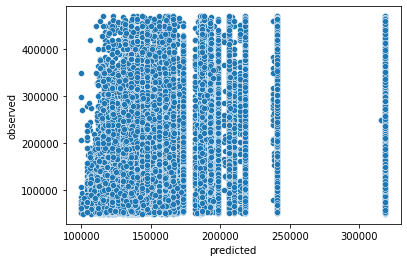

In [69]:
sns.scatterplot(data=df_graph, x="predicted", y="observed")

On affiche les composantes ayant le plus d'importance dans la régression.

<Axes: xlabel='importance', ylabel='variables'>

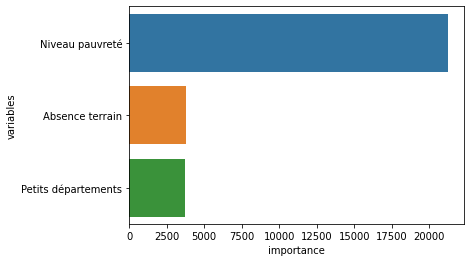

In [70]:
feat_import = pd.DataFrame({"importance": abs(sgd_regressor.coef_), "variables": ["Niveau pauvreté", "Absence terrain", "Petits départements"]}).sort_values(by="importance", ascending=False)

sns.barplot(data=feat_import,  x="importance",y="variables")

Nous pouvons voir que pour les dépendances, c'est principalement le niveau de richesse/pauvreté du département qui sont pértinents pour la prédiction.